# Letters

## Description

Generate an image with the edges of the letters present in this noisy image


## Group ID

Identify your group here, including the number and name of each group's member

In [20]:
import cv2
# to install cv2 use: pip install opencv-python
import matplotlib.pyplot as plt 
import numpy as np

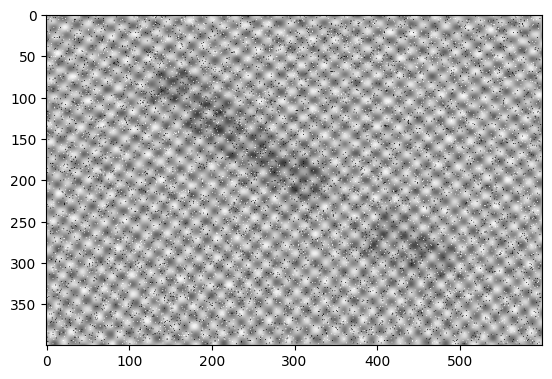

In [21]:
fname = 'Letters-noisy.png'
img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
#print('Image Shape =', img.shape())
plt.imshow(img, cmap = 'gray')

# convert the image representation to SPFP
img_float32 = np.float32(img)

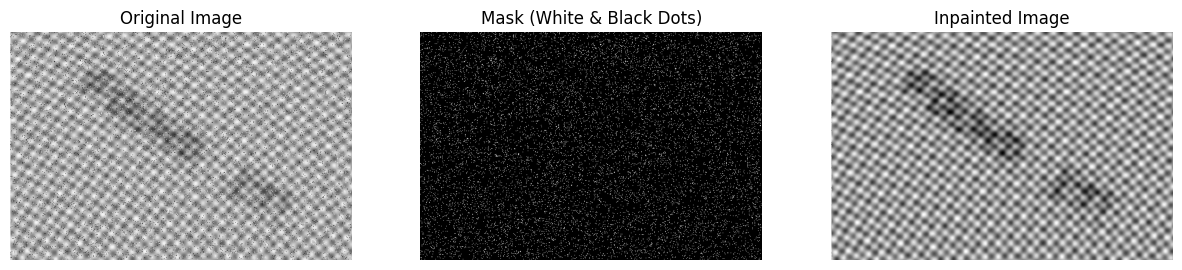

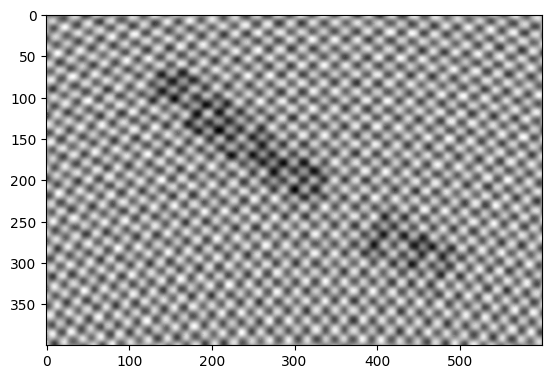

In [22]:
mask = (img == 0) | (img == 255)
mask = mask.astype(np.uint8) * 255  # Convert boolean mask to uint8 format

# Inpaint the noisy pixels
inpainted = cv2.inpaint(img, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
inpainted_float32 = np.float32(inpainted)

# Display results using Matplotlib
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(mask, cmap='gray')
ax[1].set_title("Mask (White & Black Dots)")
ax[1].axis("off")

ax[2].imshow(inpainted, cmap='gray')
ax[2].set_title("Inpainted Image")
ax[2].axis("off")

plt.show()

# show only the impainted image
plt.imshow(inpainted, cmap = 'gray')
plt.show()


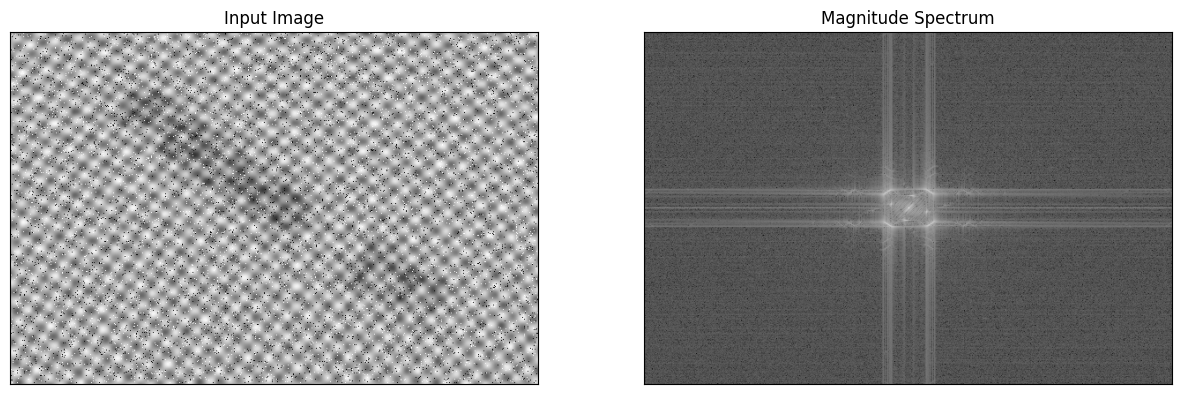

In [ ]:
# compute the DFT
# Note that the computed DFT has 2 channels :
# dft[:,:,0] - real values
# dft[:,:,1] - imaginary values
dft = cv2.dft(inpainted_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
# recenter the DFT , such that the center is (0,0)
dft_shift = np.fft.fftshift(dft)
# compute the frequency spectrum
# module of the complex value
magnitude_spectrum = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])
# compute the logarith of magnitude such that smaller values are visible
magnitude_spectrum = 20*np.log(magnitude_spectrum)

# display the image and the spectrum
fig = plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(inpainted, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show() 